In [3]:
import pandas as pd
import numpy as np

# Python version = 3.13.5

In [4]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# As there are NaN values in the dataset, we will drop those columns
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Cross-Checking for NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Encoding the Target feature.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Check for the Null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Check for Duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# There are '403' duplicate values, so now we have to remove those values
# Remove the Duplicate values

df = df.drop_duplicates(keep="first")
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

## Perform EDA

In [18]:
# Get the number of SPAM and NOT-SPAM
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

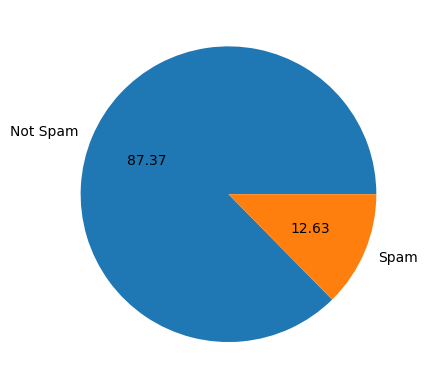

In [20]:
plt.pie(df["target"].value_counts(), labels=["Not Spam", "Spam"], autopct="%0.2f")
plt.show()

# Data is Imbalanced.

In [21]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
# Number of chars in the SMS.
df["num_chars"] = df["text"].apply(len)

# Number of words in the SMS.
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

# Number of sentences in the SMS.
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
# This is for Ham(Not-spam) messages.
df[df["target"] == 0][["num_chars", "num_words", "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# This is for Spam messages.
df[df["target"] == 1][["num_chars", "num_words", "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns

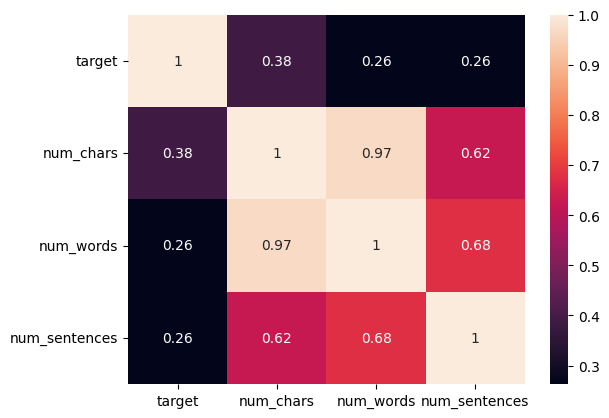

In [26]:
sns.heatmap(df[['target', 'num_chars', "num_words", 'num_sentences']].corr(), annot=True)
plt.show()

## Data Preprocessing:

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [27]:
# This is for Tokenization
from nltk.corpus import stopwords
nltk.download('stopwords')

# This is for stemming
from nltk.stem.porter import PorterStemmer

# This is set containing all the stop words in English
stop_words = set(stopwords.words("english"))

# This is used for Stemming
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import re

def transform_text(text: str):
    # remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # lowercase & tokenize
    tokens = nltk.word_tokenize(text.lower())

    # remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # stemming
    tokens = [ps.stem(word) for word in tokens]

    return " ".join(tokens)   # return string

In [29]:
# Testing the function
transform_text("Hello friends, I am Sayan!!! How are you all doing today?")

'hello friend sayan today'

In [30]:
df["transformed_text"] = df["text"].apply(transform_text)

df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [31]:
from wordcloud import WordCloud

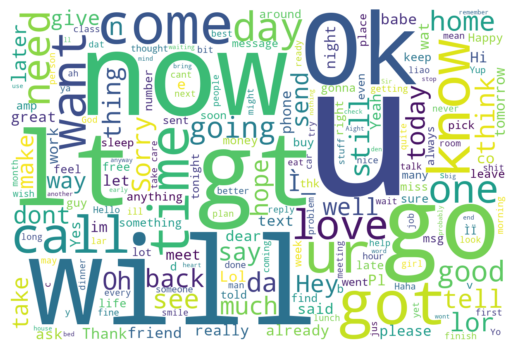

In [32]:
# Wordcloud for Not-spam text
text = " ".join(df[df["target"] == 0]["text"])

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white"
).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

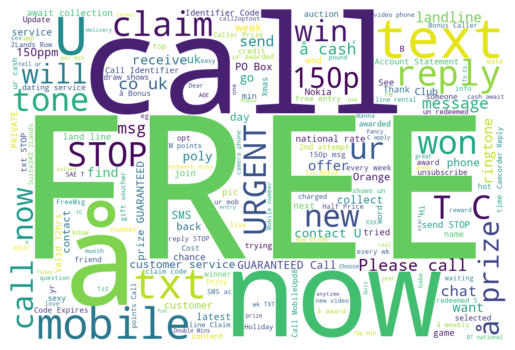

In [33]:
# Wordcloud for Spam text
text = " ".join(df[df["target"] == 1]["text"])

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white"
).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
from collections import Counter

In [35]:
# Getting Spam words
span_corpus = []

for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        span_corpus.append(word)

span_word_counts = Counter(span_corpus)

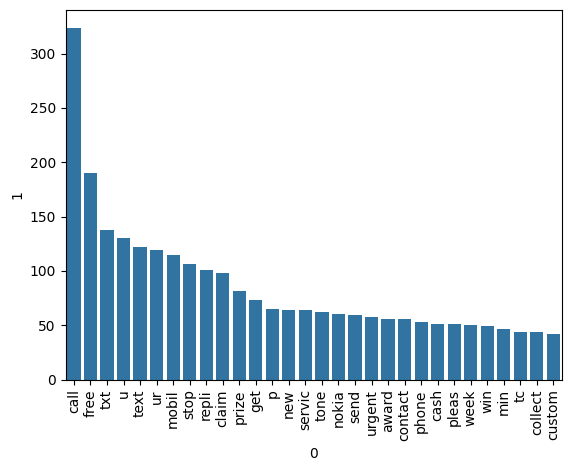

In [36]:
# Visual representation of Spam words
sns.barplot(x=pd.DataFrame(span_word_counts.most_common(30))[0],
            y=pd.DataFrame(span_word_counts.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
# Not-spam words
ham_corpus = []

for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

ham_word_counts = Counter(ham_corpus)

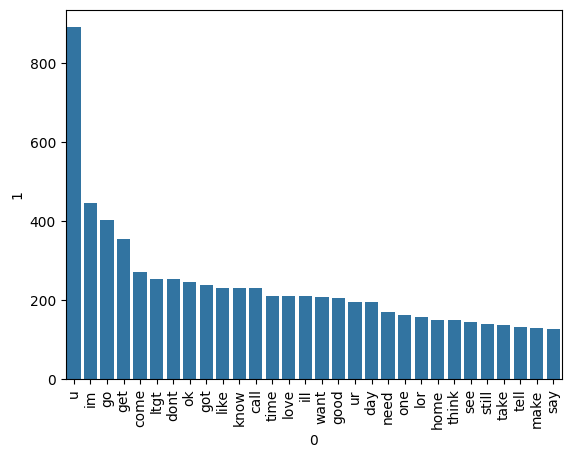

In [38]:
# Visual representation of Not-spam words
sns.barplot(x=pd.DataFrame(ham_word_counts.most_common(30))[0],
            y=pd.DataFrame(ham_word_counts.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [57]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# cv is not required
# cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [44]:
def print_evaluation(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100 :.2f}")
    print(f"Precision: {precision_score(y_true, y_pred) * 100 :.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

In [45]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print("Gaussian Naive Bayes Evaluation:")
print_evaluation(y_test, y_pred1)

Gaussian Naive Bayes Evaluation:
Accuracy: 86.75
Precision: 50.23
Confusion Matrix:
 [[787 109]
 [ 28 110]]


In [46]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print("Multinomial Naive Bayes Evaluation:")
print_evaluation(y_test, y_pred2)

Multinomial Naive Bayes Evaluation:
Accuracy: 95.45
Precision: 100.00
Confusion Matrix:
 [[896   0]
 [ 47  91]]


In [47]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("Bernoulli Naive Bayes Evaluation:")
print_evaluation(y_test, y_pred3)

Bernoulli Naive Bayes Evaluation:
Accuracy: 96.81
Precision: 94.12
Confusion Matrix:
 [[889   7]
 [ 26 112]]


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [60]:
# Support Vector Machine
svc = SVC(
    kernel="linear",
    class_weight="balanced"
)

# K-Nearest Neighbors
knc = KNeighborsClassifier(
    n_neighbors=5,
    metric="cosine"
)

# Decision Tree
dtc = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=2
)

# Logistic Regression
lrc = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

# Random Forest
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight="balanced",
    random_state=2,
    n_jobs=-1
)

# AdaBoost
abc = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.5,
    random_state=2
)

# Gradient Boosting
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=2
)

# Bagging Classifier
bc = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=2,
    n_jobs=-1
)

# XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=2
)

mnb = MultinomialNB(alpha=0.5)

In [61]:
models = {
    "SVC": svc,
    "KNeighborsClassifier": knc,
    "DecisionTreeClassifier": dtc,
    "LogisticRegression": lrc,
    "RandomForestClassifier": rfc,
    "AdaBoostClassifier": abc,
    "GradientBoostingClassifier": gbc,
    "BaggingClassifier": bc,
    "XGBClassifier": xgb,
    "MultinomialNB": mnb
}

In [51]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100

    return accuracy, precision

In [62]:
model_results = {}

for model in models:
    print(f"\nTraining: {model} Model")
    accuracy, precision = train_classifier(models[model], X_train, y_train, X_test, y_test)
    
    print(f"Accuracy is: {accuracy :.2f}")
    print(f"Precision is: {precision :.2f}\n")
    print("==" * 25)

    model_results[model] = {
        "Accuracy": accuracy,
        "Precision": precision
    }


Training: SVC Model
Accuracy is: 97.68
Precision is: 93.18


Training: KNeighborsClassifier Model
Accuracy is: 96.32
Precision is: 97.17


Training: DecisionTreeClassifier Model
Accuracy is: 93.33
Precision is: 69.94


Training: LogisticRegression Model


c:\Users\sayan\OneDrive\Desktop\Projects\machine_learning_projects\spam_detection_system\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Accuracy is: 97.68
Precision is: 93.18


Training: RandomForestClassifier Model
Accuracy is: 96.91
Precision is: 97.32


Training: AdaBoostClassifier Model
Accuracy is: 91.20
Precision is: 100.00


Training: GradientBoostingClassifier Model
Accuracy is: 95.16
Precision is: 94.00


Training: BaggingClassifier Model
Accuracy is: 93.81
Precision is: 87.00


Training: XGBClassifier Model
Accuracy is: 96.71
Precision is: 97.27


Training: MultinomialNB Model
Accuracy is: 97.58
Precision is: 98.29



In [63]:
pd.DataFrame(model_results).T

,Accuracy,Precision
SVC,97.678917,93.181818
KNeighborsClassifier,96.324952,97.169811
DecisionTreeClassifier,93.326886,69.942197
LogisticRegression,97.678917,93.181818
RandomForestClassifier,96.905222,97.321429
AdaBoostClassifier,91.199226,100.000000
GradientBoostingClassifier,95.164410,94.000000
BaggingClassifier,93.810445,87.000000
XGBClassifier,96.711799,97.272727
MultinomialNB,97.582205,98.290598


In [56]:
import pickle

In [ ]:
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))